In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
#plt.rcParams['pdf.fonttype'] = 42
import pandas as pd
from IPython.core.display import HTML
import numpy as np
%matplotlib inline
import glob
import readData
reload(readData) #avoid kernel restart if changed
import re
import databaseQuery

In [2]:
## Read in the data as a pandas dataframe
# Files should be .csv format in \Data\ subdirectory
# Files should be simply named SAGE_SOUTH or RIV_NORTH, without numerals
allFiles = glob.glob("Data\*.csv") #get all files with csv extension in this subfolder
print allFiles


#Return pandas dataframe with all the data, datetime index
#toggle saveCSV True/False to save a csv of the compiled data

voltage, radius = readData.readCSV(allFiles, saveCSV = False) 


['Data\\RIV_NORTH.csv', 'Data\\RIV_SOUTH.csv', 'Data\\SAGE_NORTH.csv', 'Data\\SAGE_SOUTH.csv']


In [3]:
## Read in the metadata as a pandas dataframe
metadata = pd.read_csv('PISTON_DENDROMETER_METADATA.csv',sep=',', dtype=str)

#Create dictionaries between sensor ID and metadata info
Site = dict(zip(metadata['Micron Displacement DSID'], metadata['Site'] )) 
Slope = dict(zip(metadata['Micron Displacement DSID'], metadata['Slope'] )) 
Species = dict(zip(metadata['Micron Displacement DSID'], metadata['Species'] )) 
Tree = dict(zip(metadata['Micron Displacement DSID'], metadata['Tree #'] )) 


In [4]:
metadata.head()

,Site,Tree #,Species,Slope,Side of Tree,Sensor ID,SE Channel Data Logger,EX Channel Data Logger,Data Logger Turn On Date,Data Logger Turn-on Time,Height Above Ground (m) (+/- 1 m),Notes,Include,Raw Voltage DSID,Micron Displacement DSID,Unnamed: 15,Unnamed: 16,Notes.1
0,Sagehorn,205,QUGA,S,NE,7,2,1,8/6/2015,18:49,3,NaN,no,50000,60000,NaN,NaN,We scraped away what we interpreted to be dead...
1,Sagehorn,205,QUGA,S,SW,27,4,2,8/6/2015,18:49,3,Threaded rods not srewed in all the way (yet)....,yes,50001,60001,NaN,NaN,We threaded rods approximately 15 cm in total ...
2,Sagehorn,206,QUGA,S,SW,6,1,1,8/6/2015,18:49,3,Threaded rods not srewed in all the way (yet)....,yes,50002,60002,NaN,NaN,NaN
3,Sagehorn,206,QUGA,S,E,23,3,2,8/6/2015,18:49,3,Threaded rods not srewed in all the way (yet)....,yes,50003,60003,NaN,NaN,NaN
4,Sagehorn,207,QUGA,S,E,43,6,3,8/6/2015,18:49,3,NaN,yes,50004,60004,NaN,NaN,NaN


In [9]:
#%% SPECIFY TIME RANGE OF SERIES
startDateTime = pd.to_datetime('2015-08-01 05:00:00')
stopDateTime = pd.to_datetime('2016-02-11 05:00:00')
radiusTR = radius[(pd.to_datetime(radius.index) > startDateTime) & 
                (pd.to_datetime(radius.index) < stopDateTime)]


In [6]:
## Import from mySQL database 
#Convert datetime stamps to strings for the sql query
dateStart = str(startDateTime.year) + '-' + str(startDateTime.month) + '-' + str(startDateTime.day)
dateStop =  str(stopDateTime.year) + '-' + str(stopDateTime.month) + '-' + str(stopDateTime.day)

#here we make use of external .py file with odmquery function (thanks Collin!) to get data from the database
#1672 = cumulative WY precip, in mm
#1785 = Rainfall mm TB4 WSAM RWS_Rain_TB4_Tot2015-03-26 (ongoing)Rainfall mmAngelo Meadow WSwsam0 to 700TB4mm-L Rain Gage
#2958 = Barometric Pressure, WSSR, mBar
#2959 = Rainfall, WSSR, mm
#3048 = Rainfall Cumulative mm Sagehorn
# atmP = databaseQuery.odmquery(dateStart, dateStop, '2958', True)
# atmP.plot()
#rain = databaseQuery.odmquery(dateStart, dateStop, '2957', True)



OperationalError: (2003, "Can't connect to MySQL server on 'gall.berkeley.edu' (10060)")

In [10]:
## Normalize values
radiusMin = radiusTR.apply(np.min)

#center to zero
radiusZeroed =  radiusTR-radiusMin



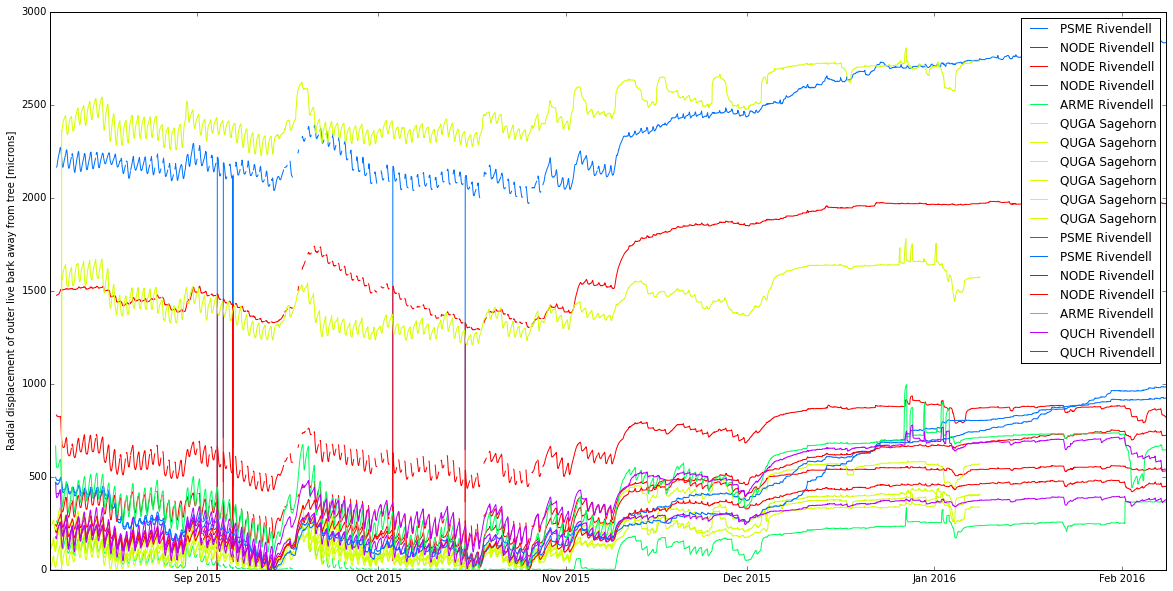

In [11]:
# fig, ax = plt.subplots(2, sharex=True, figsize=(17, 22))

fig = plt.figure(figsize=(20,10))
# Get unique names of species
uniq = list(set(metadata['Species']))

# Set the color map to match the number of species
# z = range(1,len(uniq))
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('hsv') )


for column in radiusZeroed:
#         plt.figure()
    ax = plt.plot(radiusZeroed.index, radiusZeroed[column], 
             color=scalarMap.to_rgba(uniq.index(Species[column])), 
             label = (Species[column] + ' ' + Site[column]))
    plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Radial displacement of outer live bark away from tree [microns]')



In [ ]:
plt.figure(figsize=(17, 4))
plt.plot(rain.index,rain['DataValue'])

$$a + b / 3$$